<a href="https://colab.research.google.com/github/skaria76/intro-ml-course-winter2025/blob/main/HAD7001_Course_Project_Filtered_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Dataset

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("drive/My Drive/Primary Care_filtered_data_v2.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Libraries/Packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, f1_score, roc_curve
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Data Exploration and Cleaning

In [ ]:
df.shape

(102736, 31)

In [ ]:
# List the columns of the dataframe
df.columns.tolist()

['Age_at_Exam',
 'Sex',
 'BMI',
 'LDL',
 'HDL',
 'A1c',
 'TG',
 'FBS',
 'Diabetes',
 'Depression',
 'HTN',
 'OA',
 'COPD',
 'Patient_ID',
 '[Anxiety)',
 '[Arrhythmia)',
 '[AtrialFibrillation)',
 '[CABG)',
 '[CAD)',
 '[Cancer)',
 '[Cardiomyopathy)',
 '[Cataract)',
 '[CKD)',
 '[Gangrene)',
 '[GERD)',
 '[Glaucoma)',
 '[MyocardialInfarct)',
 '[Neuropathy)',
 '[PVD)',
 '[Stent)',
 '[Stroke)']

In [ ]:
# Get frequency of values, including missing (NaN) values
stroke_counts = df['[Stroke)'].value_counts(dropna=False)

# Print frequency counts
print(stroke_counts)


[Stroke)
0.0    97140
1.0     5596
Name: count, dtype: int64


In [ ]:
# Get unique values
unique_values = df['[Stroke)'].unique()

# Print result
unique_values

array([0., 1.])

In [ ]:
# Find columns with missing values
missing_values = df.isnull().sum()

# Filter columns that have missing values
missing_values = missing_values[missing_values > 0]

# Display columns with missing values and their counts
print(missing_values)

LDL      416
HDL      731
A1c    49956
TG       702
dtype: int64


In [ ]:
# Display missing values in a readable format
missing_values_df = pd.DataFrame({'Feature': df.columns, 'Missing Values': df.isnull().sum()})
print(missing_values_df)

                                   Feature  Missing Values
Age_at_Exam                    Age_at_Exam               0
Sex                                    Sex               0
BMI                                    BMI               0
LDL                                    LDL             416
HDL                                    HDL             731
A1c                                    A1c           49956
TG                                      TG             702
FBS                                    FBS               0
Diabetes                          Diabetes               0
Depression                      Depression               0
HTN                                    HTN               0
OA                                      OA               0
COPD                                  COPD               0
Patient_ID                      Patient_ID               0
[Anxiety)                        [Anxiety)               0
[Arrhythmia)                  [Arrhythmia)              

In [ ]:
pd.set_option('display.max_columns', None) #remove limit on max # of columns displayed

In [ ]:
df.shape

(102736, 31)

In [ ]:
# Count occurrences of each unique patient ID
patient_counts = df['Patient_ID'].value_counts()

# Filter patients that appear more than once
duplicate_patients = patient_counts[patient_counts > 1]

# Display the number of patients who appear more than once
print(f"Number of patients represented more than once: {len(duplicate_patients)}")

# Optionally, display the actual counts for each duplicated patient
print(duplicate_patients)

Number of patients represented more than once: 13389
Patient_ID
8001000807063728    153
4001000000011545    147
8001000805024400    138
8001000805024174    131
8001000805029756    121
                   ... 
4001000000051996      2
4001000000046741      2
4001000000266724      2
4001000000266049      2
4001000000261855      2
Name: count, Length: 13389, dtype: int64


In [ ]:
df.head()

,Age_at_Exam,Sex,BMI,LDL,HDL,A1c,TG,FBS,Diabetes,Depression,HTN,OA,COPD,Patient_ID,[Anxiety),[Arrhythmia),[AtrialFibrillation),[CABG),[CAD),[Cancer),[Cardiomyopathy),[Cataract),[CKD),[Gangrene),[GERD),[Glaucoma),[MyocardialInfarct),[Neuropathy),[PVD),[Stent),[Stroke)
0,43,Female,20.000000,2.02,2.08,NaN,0.69,4.9,0,1,0,0,0,4001000000255907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,69,Female,28.000000,4.04,2.38,NaN,1.58,4.9,0,1,0,0,0,4001000000256036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,56,Female,65.317051,3.04,1.39,NaN,1.04,4.2,0,0,1,0,0,4001000000256926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,65,Male,23.000000,5.07,2.00,NaN,0.92,6.3,0,1,1,0,0,4001000000255844,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78,Female,40.975293,1.39,0.87,5.2,1.22,5.2,0,0,1,1,1,4001000000256057,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
description = df.describe()
description

,Age_at_Exam,BMI,LDL,HDL,A1c,TG,FBS,Diabetes,Depression,HTN,OA,COPD,Patient_ID,[Anxiety),[Arrhythmia),[AtrialFibrillation),[CABG),[CAD),[Cancer),[Cardiomyopathy),[Cataract),[CKD),[Gangrene),[GERD),[Glaucoma),[MyocardialInfarct),[Neuropathy),[PVD),[Stent),[Stroke)
count,102736.000000,102736.000000,102320.000000,102005.000000,52780.000000,102034.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,1.027360e+05,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000,102736.000000
mean,63.371788,29.345404,2.733291,1.394754,6.227432,1.472864,5.765893,0.304635,0.278929,0.610448,0.349926,0.094543,3.366895e+15,0.335238,0.008536,0.057409,0.017180,0.077373,0.371934,0.007855,0.160586,0.003699,0.004701,0.155846,0.064418,0.094222,0.046780,0.035839,0.035674,0.054470
std,13.760294,6.636445,0.959721,0.416662,0.875836,0.940858,1.377827,0.460255,0.448474,0.487651,0.476949,0.292585,1.947554e+15,0.472076,0.091998,0.232624,0.129942,0.267184,0.483323,0.088281,0.367151,0.060705,0.068406,0.362711,0.245496,0.292139,0.211169,0.185891,0.185477,0.226943
min,18.000000,10.200000,0.100000,0.130000,3.100000,0.100000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,25.028664,2.020000,1.100000,5.700000,0.910000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,28.300000,2.650000,1.330000,6.000000,1.270000,5.400000,0.000000,0.000000,1.000000,0.000000,0.000000,4.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74.000000,32.364783,3.360000,1.620000,6.600000,1.790000,6.100000,1.000000,1.000000,1.000000,1.000000,0.000000,4.001000e+15,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,218.700000,10.000000,4.720000,15.300000,57.340000,33.800000,1.000000,1.000000,1.000000,1.000000,1.000000,9.001000e+15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Handling Duplicates in Patient ID

In [ ]:
# Count occurrences of each unique patient ID
patient_counts = df['Patient_ID'].value_counts()

# Filter patients that appear more than once
duplicate_patients = patient_counts[patient_counts > 1]

# Display the number of patients who appear more than once
print(f"Number of patients represented more than once: {len(duplicate_patients)}")

# Display the actual counts for each duplicated patient
print(duplicate_patients)

Number of patients represented more than once: 13389
Patient_ID
8001000807063728    153
4001000000011545    147
8001000805024400    138
8001000805024174    131
8001000805029756    121
                   ... 
4001000000051996      2
4001000000046741      2
4001000000266724      2
4001000000266049      2
4001000000261855      2
Name: count, Length: 13389, dtype: int64


In [ ]:
# Count how many patients have exactly one record
patients_with_one_observation = (patient_counts == 1).sum()

# Print the result
print(f"Number of patients who appear only once: {patients_with_one_observation}")

Number of patients who appear only once: 3801


#Only keeping each patients last observation

In [ ]:
# For patients with multiple observations, only keep the last observation
df = df.drop_duplicates(subset=['Patient_ID'], keep='last')  # Keeps the last occurrence

In [ ]:
df.shape

(17190, 31)

In [ ]:
# Count occurrences of each unique patient ID
patient_counts = df['Patient_ID'].value_counts()

# Filter patients that appear more than once
duplicate_patients = patient_counts[patient_counts > 1]

# Display the number of patients who appear more than once
print(f"Number of patients represented more than once: {len(duplicate_patients)}")

Number of patients represented more than once: 0


#Data Cleaning


# Age

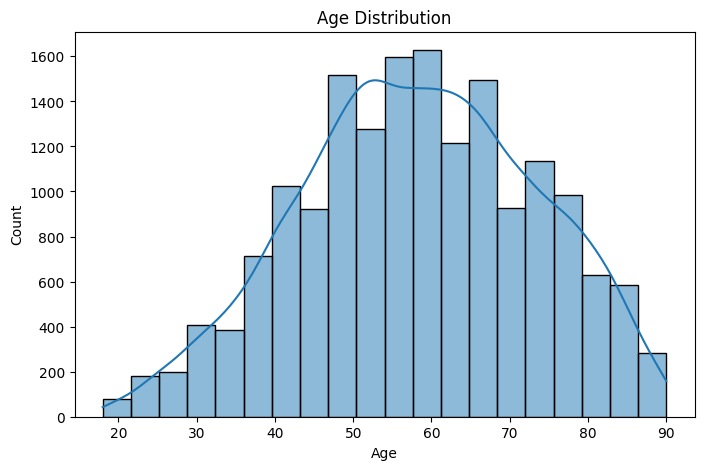

In [ ]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['Age_at_Exam'], bins=20, kde=True)  # kde=True adds a density curve
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

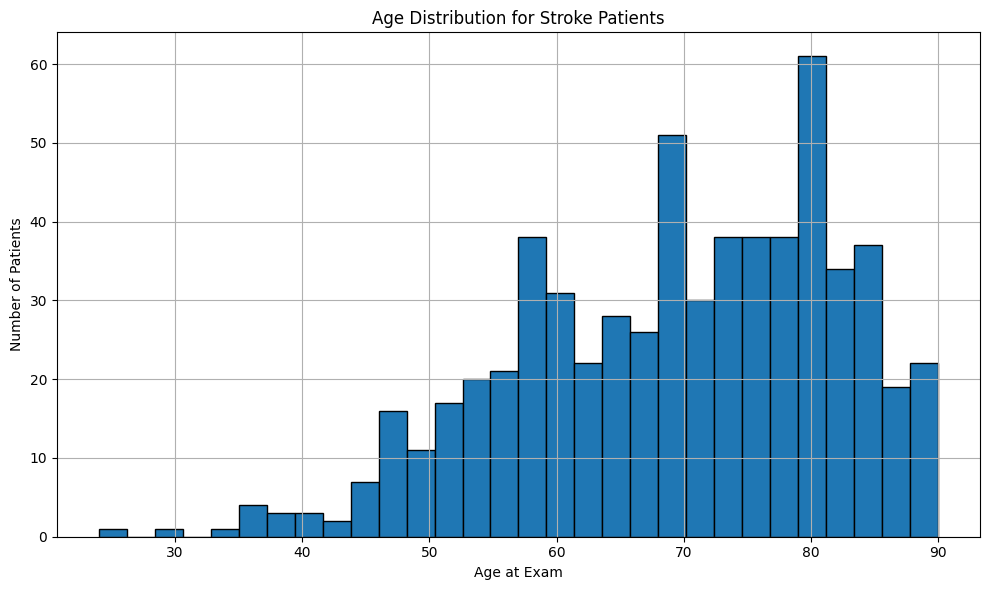

In [ ]:
# Filter the data
stroke_positive = df[df['[Stroke)'] == 1]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(stroke_positive['Age_at_Exam'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution for Stroke Patients')
plt.xlabel('Age at Exam')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.tight_layout()
plt.show()

## Stroke Summary Stats

In [ ]:
# Filter the data
stroke_positive = df[df['[Stroke)'] == 1]

# Get summary statistics
summary_stats = stroke_positive.describe()

# Print summary
summary_stats

,Age_at_Exam,BMI,LDL,HDL,A1c,TG,FBS,Diabetes,Depression,HTN,OA,COPD,Patient_ID,[Anxiety),[Arrhythmia),[AtrialFibrillation),[CABG),[CAD),[Cancer),[Cardiomyopathy),[Cataract),[CKD),[Gangrene),[GERD),[Glaucoma),[MyocardialInfarct),[Neuropathy),[PVD),[Stent),[Stroke)
count,620.000000,620.000000,615.000000,615.00000,303.000000,615.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,6.200000e+02,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.00000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.0
mean,69.298387,28.074339,2.487041,1.35452,6.133993,1.413138,5.676129,0.262903,0.233871,0.650000,0.366129,0.132258,3.333560e+15,0.211290,0.008065,0.066129,0.030645,0.104839,0.287097,0.009677,0.15000,0.006452,0.003226,0.098387,0.045161,0.108065,0.037097,0.054839,0.024194,1.0
std,12.525502,5.515981,0.954014,0.40397,0.734351,0.798097,1.220812,0.440566,0.423633,0.477355,0.482134,0.339045,1.617135e+15,0.408553,0.089512,0.248708,0.172494,0.306593,0.452772,0.097976,0.35736,0.080127,0.056750,0.298078,0.207825,0.310713,0.189152,0.227849,0.153774,0.0
min,24.000000,13.969970,0.600000,0.50000,4.800000,0.400000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,60.000000,24.500000,1.730000,1.06000,5.700000,0.895000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,71.000000,27.300000,2.370000,1.28000,6.000000,1.260000,5.400000,0.000000,0.000000,1.000000,0.000000,0.000000,4.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,80.000000,30.600000,3.105000,1.59000,6.400000,1.735000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,4.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,90.000000,69.170000,5.700000,3.00000,11.200000,8.820000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.001000e+15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [ ]:
df.shape

(17190, 31)

# Body Mass Index (BMI)

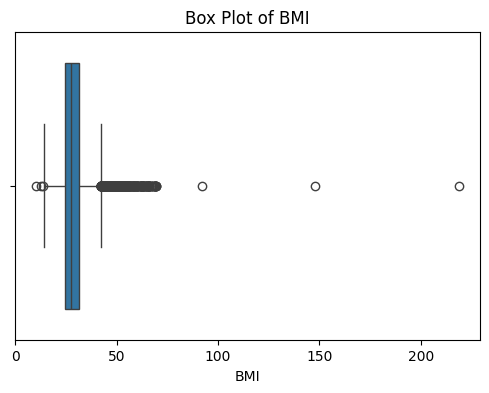

In [ ]:
# BMI Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['BMI'])
plt.xlabel('BMI')
plt.title('Box Plot of BMI')
plt.show()


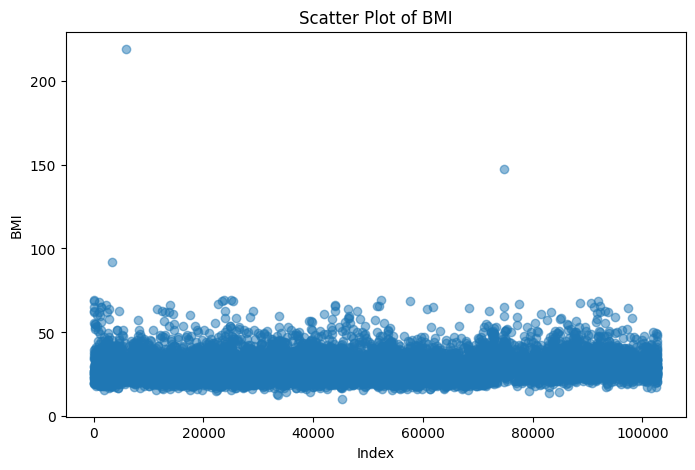

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df.index, df['BMI'], alpha=0.5)
plt.xlabel('Index')
plt.ylabel('BMI')
plt.title('Scatter Plot of BMI')
plt.show()

In [ ]:
# Count values where BMI is greater than 70
bmi_above_70_count = (df['BMI'] > 70).sum()

# Print the count
print(f"Number of BMI values above 70: {bmi_above_70_count}")

Number of BMI values above 70: 3


In [ ]:
# Count values where BMI is greater than 50
bmi_below_12_count = (df['BMI'] < 12).sum()

# Print the count
print(f"Number of BMI values below 12: {bmi_below_12_count}")

Number of BMI values below 12: 1


In [ ]:
# Keep only rows where BMI is between 12 and 70
df = df[(df['BMI'] >= 12) & (df['BMI'] <= 70)]

In [ ]:
df.shape

(17186, 31)

# LDL Cholesterol

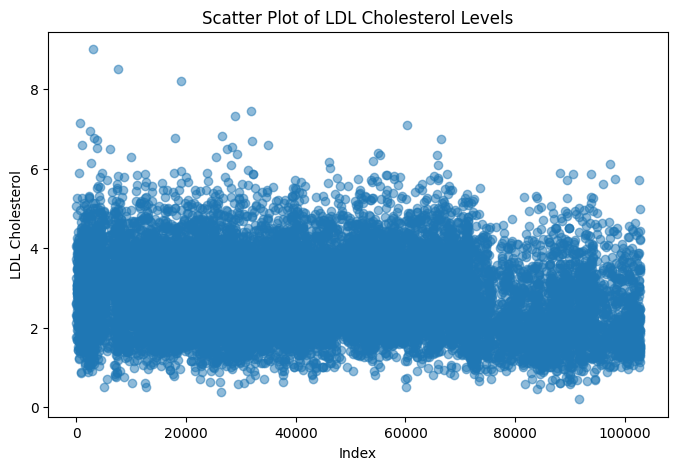

In [ ]:
# Scatter plot of LDL values
plt.figure(figsize=(8, 5))
plt.scatter(df.index, df['LDL'], alpha=0.5)
plt.xlabel('Index')
plt.ylabel('LDL Cholesterol')
plt.title('Scatter Plot of LDL Cholesterol Levels')
plt.show()


In [ ]:
# Define the feasible range for LDL (Low-Density Lipoprotein Cholesterol)
ldl_feasible_min = 0.5  # Lower bound
ldl_feasible_max = 10.0  # Upper bound

# Keep rows where LDL is within range OR is missing (NaN)
df = df[((df['LDL'] >= ldl_feasible_min) & (df['LDL'] <= ldl_feasible_max)) | df['LDL'].isna()]

In [ ]:
df.shape

(17183, 31)

# HDL Cholesterol

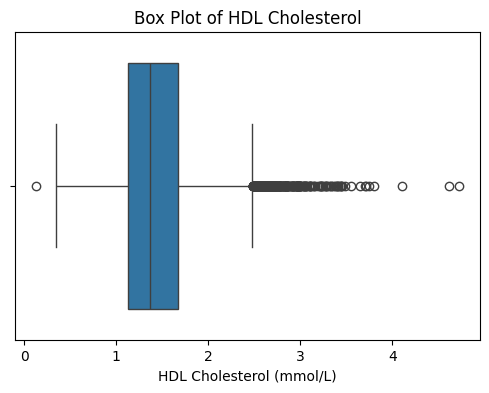

In [ ]:
# Create the HDL box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['HDL'])
plt.xlabel('HDL Cholesterol (mmol/L)')
plt.title('Box Plot of HDL Cholesterol')
plt.show()

In [ ]:
# Define the feasible range for HDL cholesterol
hdl_feasible_min = 0.5  # Lower bound
hdl_feasible_max = 3.5  # Upper bound

# Keep rows where HDL is within range OR is missing (NaN)
df = df[((df['HDL'] >= hdl_feasible_min) & (df['HDL'] <= hdl_feasible_max)) | df['HDL'].isna()]

In [ ]:
df.shape

(17164, 31)

In [ ]:
df.describe()

,Age_at_Exam,BMI,LDL,HDL,A1c,TG,FBS,Diabetes,Depression,HTN,OA,COPD,Patient_ID,[Anxiety),[Arrhythmia),[AtrialFibrillation),[CABG),[CAD),[Cancer),[Cardiomyopathy),[Cataract),[CKD),[Gangrene),[GERD),[Glaucoma),[MyocardialInfarct),[Neuropathy),[PVD),[Stent),[Stroke)
count,17164.000000,17164.000000,17102.000000,16982.000000,7008.000000,17004.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,1.716400e+04,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000
mean,58.159170,28.524963,2.868536,1.431140,6.018445,1.389726,5.448424,0.160394,0.294162,0.414123,0.258972,0.069797,3.255877e+15,0.357725,0.006991,0.035947,0.009904,0.050280,0.334887,0.006875,0.109124,0.002447,0.002039,0.146935,0.044162,0.062165,0.033209,0.021440,0.027966,0.036122
std,15.059294,6.324036,0.926591,0.420421,0.841742,0.838780,1.157490,0.366982,0.455679,0.492584,0.438083,0.254812,1.909929e+15,0.479345,0.083324,0.186164,0.099030,0.218528,0.471965,0.082632,0.311803,0.049408,0.045112,0.354052,0.205461,0.241462,0.179187,0.144851,0.164879,0.186599
min,18.000000,12.871972,0.500000,0.500000,3.100000,0.220000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,24.270000,2.200000,1.130000,5.500000,0.850000,4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.003000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,27.540000,2.815000,1.370000,5.800000,1.190000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69.000000,31.400000,3.470000,1.670000,6.300000,1.692500,5.700000,0.000000,1.000000,1.000000,1.000000,0.000000,4.001000e+15,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,69.310000,9.000000,3.480000,13.800000,19.550000,33.800000,1.000000,1.000000,1.000000,1.000000,1.000000,9.001000e+15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Hemoglobin A1C

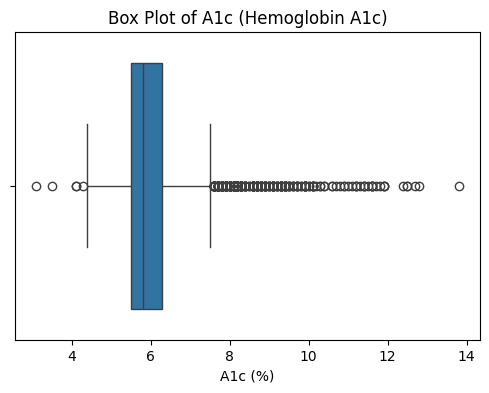

In [ ]:
# Create the box plot for A1c
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['A1c'])
plt.xlabel('A1c (%)')
plt.title('Box Plot of A1c (Hemoglobin A1c)')
plt.show()

In [ ]:
# Count A1c values outside the feasible range (below 3.5% or above 15%)
a1c_outlier_count = ((df['A1c'] < 3.5) | (df['A1c'] > 15)).sum()

# Print the result
print(f"Number of A1c values below 3.5% or above 15%: {a1c_outlier_count}")


Number of A1c values below 3.5% or above 15%: 1


In [ ]:
# A1c left alone

In [ ]:
df.shape

(17164, 31)

# Triglycerides

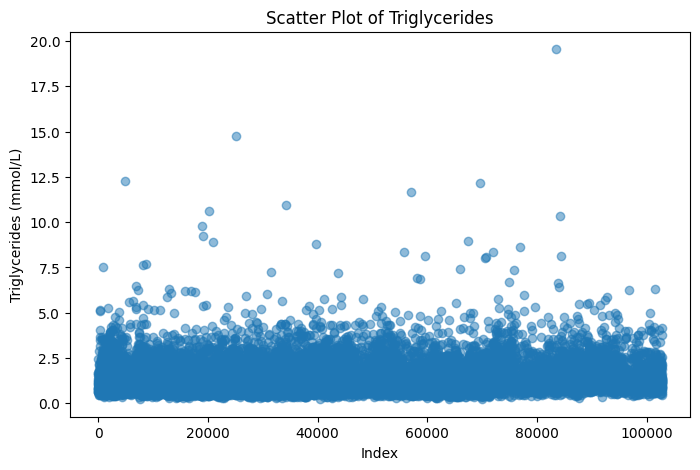

In [ ]:
# Scatter plot of TG values
plt.figure(figsize=(8, 5))
plt.scatter(df.index, df['TG'], alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Triglycerides (mmol/L)')
plt.title('Scatter Plot of Triglycerides')
plt.show()


In [ ]:
# Count TG values greater than 15 mmol/L
tg_above_15_count = (df['TG'] > 15).sum()

# Print the count
print(f"Number of triglyceride (TG) values above 15 mmol/L: {tg_above_15_count}")

Number of triglyceride (TG) values above 15 mmol/L: 1


In [ ]:
# Define the feasible range for Triglycerides (TG)
feasible_min_tg = 0.3  # Lower bound
feasible_max_tg = 15.0  # Upper bound

# Keep rows where TG is within range OR is missing (NaN)
df = df[((df['TG'] >= feasible_min_tg) & (df['TG'] <= feasible_max_tg)) | df['TG'].isna()]

In [ ]:
df.shape

(17151, 31)

In [ ]:
df.describe()

,Age_at_Exam,BMI,LDL,HDL,A1c,TG,FBS,Diabetes,Depression,HTN,OA,COPD,Patient_ID,[Anxiety),[Arrhythmia),[AtrialFibrillation),[CABG),[CAD),[Cancer),[Cardiomyopathy),[Cataract),[CKD),[Gangrene),[GERD),[Glaucoma),[MyocardialInfarct),[Neuropathy),[PVD),[Stent),[Stroke)
count,17151.000000,17151.000000,17089.000000,16969.000000,7004.000000,16991.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,1.715100e+04,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000,17151.000000
mean,58.166229,28.527365,2.868889,1.431093,6.018141,1.389449,5.448449,0.160399,0.294269,0.414203,0.259110,0.069850,3.256011e+15,0.357763,0.006997,0.035975,0.009912,0.050259,0.334616,0.006880,0.109148,0.002449,0.002041,0.147047,0.044196,0.062212,0.033234,0.021398,0.027987,0.036149
std,15.058984,6.324533,0.926688,0.420457,0.840759,0.826916,1.156807,0.366986,0.455727,0.492598,0.438159,0.254902,1.909686e+15,0.479356,0.083355,0.186232,0.099067,0.218486,0.471870,0.082663,0.311834,0.049427,0.045129,0.354163,0.205536,0.241547,0.179253,0.144712,0.164939,0.186667
min,18.000000,12.871972,0.500000,0.500000,3.100000,0.300000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,24.280000,2.200000,1.130000,5.500000,0.850000,4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.003000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,27.540000,2.820000,1.370000,5.800000,1.190000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69.000000,31.400000,3.470000,1.670000,6.300000,1.700000,5.700000,0.000000,1.000000,1.000000,1.000000,0.000000,4.001000e+15,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90.000000,69.310000,9.000000,3.480000,13.800000,14.760000,33.800000,1.000000,1.000000,1.000000,1.000000,1.000000,9.001000e+15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Fasting Blood Sugar (FBS)

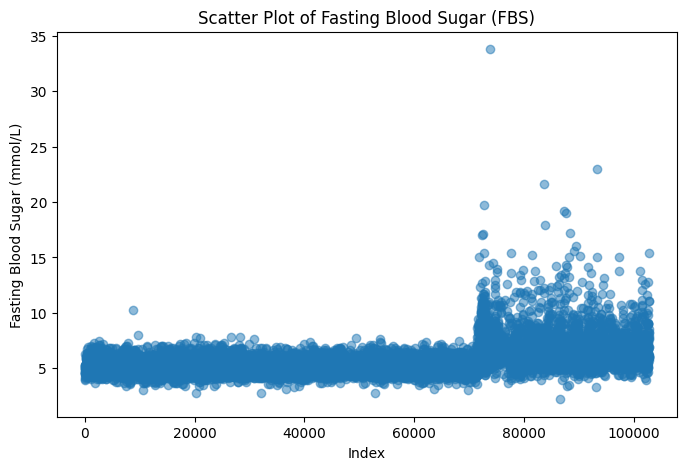

In [ ]:
# Scatter plot of FBS values
plt.figure(figsize=(8, 5))
plt.scatter(df.index, df['FBS'], alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Fasting Blood Sugar (mmol/L)')
plt.title('Scatter Plot of Fasting Blood Sugar (FBS)')
plt.show()


In [ ]:
# Count records where FBS is below 3.0 mmol/L
fbs_below_3_count = (df['FBS'] < 3.0).sum()

# Print the result
print(f"Number of observations with FBS below 3.0 mmol/L: {fbs_below_3_count}")

# Count records where FBS is above 25.0 mmol/L
fbs_above_25_count = (df['FBS'] > 25.0).sum()

# Print the result
print(f"Number of observations with FBS above 25.0 mmol/L: {fbs_above_25_count}")


Number of observations with FBS below 3.0 mmol/L: 4
Number of observations with FBS above 25.0 mmol/L: 1


In [ ]:
# Define the feasible range for Fasting Blood Sugar (FBS)
feasible_min_fbs = 3.0  # Lower bound (hypoglycemia threshold)
feasible_max_fbs = 25.0  # Upper bound (severe hyperglycemia)

# Keep rows where FBS is within range OR is missing (NaN)
df = df[((df['FBS'] >= feasible_min_fbs) & (df['FBS'] <= feasible_max_fbs)) | df['FBS'].isna()]


In [ ]:
df.shape

(17146, 31)

In [ ]:
df.describe()

,Age_at_Exam,BMI,LDL,HDL,A1c,TG,FBS,Diabetes,Depression,HTN,OA,COPD,Patient_ID,[Anxiety),[Arrhythmia),[AtrialFibrillation),[CABG),[CAD),[Cancer),[Cardiomyopathy),[Cataract),[CKD),[Gangrene),[GERD),[Glaucoma),[MyocardialInfarct),[Neuropathy),[PVD),[Stent),[Stroke)
count,17146.000000,17146.000000,17084.000000,16964.000000,7003.000000,16987.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,1.714600e+04,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.00000,17146.000000,17146.000000,17146.000000,17146.000000
mean,58.168844,28.526744,2.868926,1.431068,6.017615,1.389617,5.447448,0.160329,0.294179,0.414149,0.259069,0.069812,3.256027e+15,0.357868,0.006999,0.035985,0.009915,0.050274,0.334714,0.006882,0.109180,0.002450,0.002041,0.147090,0.044209,0.06223,0.033244,0.021404,0.027995,0.036160
std,15.059645,6.324994,0.926722,0.420483,0.839667,0.826929,1.135723,0.366922,0.455686,0.492589,0.438136,0.254838,1.909433e+15,0.479387,0.083368,0.186258,0.099081,0.218516,0.471904,0.082675,0.311874,0.049434,0.045136,0.354206,0.205564,0.24158,0.179278,0.144732,0.164963,0.186694
min,18.000000,12.871972,0.500000,0.500000,3.100000,0.300000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,24.272500,2.200000,1.130000,5.500000,0.850000,4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.003000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,27.540000,2.820000,1.370000,5.800000,1.190000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,69.000000,31.400000,3.470000,1.670000,6.300000,1.700000,5.700000,0.000000,1.000000,1.000000,1.000000,0.000000,4.001000e+15,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,90.000000,69.310000,9.000000,3.480000,13.800000,14.760000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.001000e+15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.shape

(17146, 31)

In [ ]:
# Find columns with missing values
missing_values = df.isnull().sum()

# Filter columns that have missing values
missing_values = missing_values[missing_values > 0]

# Display columns with missing values and their counts
print(missing_values)

LDL       62
HDL      182
A1c    10143
TG       159
dtype: int64


In [ ]:
# Display missing values in a readable format
missing_values_df = pd.DataFrame({'Feature': df.columns, 'Missing Values': df.isnull().sum()})
print(missing_values_df)

                                   Feature  Missing Values
Age_at_Exam                    Age_at_Exam               0
Sex                                    Sex               0
BMI                                    BMI               0
LDL                                    LDL              62
HDL                                    HDL             182
A1c                                    A1c           10143
TG                                      TG             159
FBS                                    FBS               0
Diabetes                          Diabetes               0
Depression                      Depression               0
HTN                                    HTN               0
OA                                      OA               0
COPD                                  COPD               0
Patient_ID                      Patient_ID               0
[Anxiety)                        [Anxiety)               0
[Arrhythmia)                  [Arrhythmia)              

In [ ]:
df

,Age_at_Exam,Sex,BMI,LDL,HDL,A1c,TG,FBS,Diabetes,Depression,HTN,OA,COPD,Patient_ID,[Anxiety),[Arrhythmia),[AtrialFibrillation),[CABG),[CAD),[Cancer),[Cardiomyopathy),[Cataract),[CKD),[Gangrene),[GERD),[Glaucoma),[MyocardialInfarct),[Neuropathy),[PVD),[Stent),[Stroke)
18,65,Male,23.000000,5.07,2.00,NaN,0.92,6.3,0,1,1,0,0,4001000000255844,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,33,Male,55.690431,4.04,0.94,NaN,1.66,4.8,0,0,0,0,0,4001000000262265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,47,Female,20.000000,1.76,1.75,NaN,0.77,4.7,0,1,0,0,0,4001000000255907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30,50,Female,29.733333,2.61,1.53,NaN,1.58,5.3,0,1,1,0,0,4001000000257377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,56,Male,62.963149,3.73,1.20,NaN,1.32,4.6,0,0,0,0,0,4001000000261800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102726,59,Female,25.060000,3.44,1.49,6.2,1.18,5.7,1,0,0,0,0,4001000000025428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102728,84,Male,23.420000,1.34,1.28,7.3,1.41,11.1,1,0,1,0,0,4001000000051061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
102730,69,Male,33.890000,1.51,0.63,7.2,1.45,8.2,1,0,1,1,0,4001000000051496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102733,53,Female,27.990000,1.84,1.65,6.5,0.84,6.9,1,0,0,0,0,4001000000046730,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Get frequency of values, including missing (NaN) values
stroke_counts = df['[Stroke)'].value_counts(dropna=False)

# Print frequency counts
print(stroke_counts)

[Stroke)
0.0    16526
1.0      620
Name: count, dtype: int64


# Sex

In [ ]:
print(df['Sex'].unique())  # Check unique values

['Male' 'Female']


In [ ]:
# Encoding sex to numerical: 1 = Male, 0 = Female
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})


In [ ]:
df

,Age_at_Exam,Sex,BMI,LDL,HDL,A1c,TG,FBS,Diabetes,Depression,HTN,OA,COPD,Patient_ID,[Anxiety),[Arrhythmia),[AtrialFibrillation),[CABG),[CAD),[Cancer),[Cardiomyopathy),[Cataract),[CKD),[Gangrene),[GERD),[Glaucoma),[MyocardialInfarct),[Neuropathy),[PVD),[Stent),[Stroke)
18,65,1,23.000000,5.07,2.00,NaN,0.92,6.3,0,1,1,0,0,4001000000255844,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,33,1,55.690431,4.04,0.94,NaN,1.66,4.8,0,0,0,0,0,4001000000262265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,47,0,20.000000,1.76,1.75,NaN,0.77,4.7,0,1,0,0,0,4001000000255907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30,50,0,29.733333,2.61,1.53,NaN,1.58,5.3,0,1,1,0,0,4001000000257377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,56,1,62.963149,3.73,1.20,NaN,1.32,4.6,0,0,0,0,0,4001000000261800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102726,59,0,25.060000,3.44,1.49,6.2,1.18,5.7,1,0,0,0,0,4001000000025428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102728,84,1,23.420000,1.34,1.28,7.3,1.41,11.1,1,0,1,0,0,4001000000051061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
102730,69,1,33.890000,1.51,0.63,7.2,1.45,8.2,1,0,1,1,0,4001000000051496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102733,53,0,27.990000,1.84,1.65,6.5,0.84,6.9,1,0,0,0,0,4001000000046730,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe()

,Age_at_Exam,Sex,BMI,LDL,HDL,A1c,TG,FBS,Diabetes,Depression,HTN,OA,COPD,Patient_ID,[Anxiety),[Arrhythmia),[AtrialFibrillation),[CABG),[CAD),[Cancer),[Cardiomyopathy),[Cataract),[CKD),[Gangrene),[GERD),[Glaucoma),[MyocardialInfarct),[Neuropathy),[PVD),[Stent),[Stroke)
count,17146.000000,17146.000000,17146.000000,17084.000000,16964.000000,7003.000000,16987.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,1.714600e+04,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.000000,17146.00000,17146.000000,17146.000000,17146.000000,17146.000000
mean,58.168844,0.361134,28.526744,2.868926,1.431068,6.017615,1.389617,5.447448,0.160329,0.294179,0.414149,0.259069,0.069812,3.256027e+15,0.357868,0.006999,0.035985,0.009915,0.050274,0.334714,0.006882,0.109180,0.002450,0.002041,0.147090,0.044209,0.06223,0.033244,0.021404,0.027995,0.036160
std,15.059645,0.480343,6.324994,0.926722,0.420483,0.839667,0.826929,1.135723,0.366922,0.455686,0.492589,0.438136,0.254838,1.909433e+15,0.479387,0.083368,0.186258,0.099081,0.218516,0.471904,0.082675,0.311874,0.049434,0.045136,0.354206,0.205564,0.24158,0.179278,0.144732,0.164963,0.186694
min,18.000000,0.000000,12.871972,0.500000,0.500000,3.100000,0.300000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,24.272500,2.200000,1.130000,5.500000,0.850000,4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.003000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,0.000000,27.540000,2.820000,1.370000,5.800000,1.190000,5.200000,0.000000,0.000000,0.000000,0.000000,0.000000,4.001000e+15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,69.000000,1.000000,31.400000,3.470000,1.670000,6.300000,1.700000,5.700000,0.000000,1.000000,1.000000,1.000000,0.000000,4.001000e+15,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,90.000000,1.000000,69.310000,9.000000,3.480000,13.800000,14.760000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.001000e+15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Get frequency of values, including missing (NaN) values
stroke_counts = df['[Stroke)'].value_counts(dropna=False)

# Print frequency counts
print(stroke_counts)

[Stroke)
0.0    16526
1.0      620
Name: count, dtype: int64


###View stroke cases (commented out)

In [ ]:
"""# Filter rows where stroke is 1
stroke_positive = df[df['[Stroke)'] == 1]

# Display all columns and rows (prevent truncation)
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# View result
stroke_positive"""


"# Filter rows where stroke is 1\nstroke_positive = df[df['[Stroke)'] == 1]\n\n# Display all columns and rows (prevent truncation)\nimport pandas as pd\npd.set_option('display.max_rows', None)\npd.set_option('display.max_columns', None)\npd.set_option('display.width', None)\npd.set_option('display.max_colwidth', None)\n\n# View result\nstroke_positive"

# SKIPPED - OPTION 2 for handling multiple patient observations: Aggregating to mode for binary features and mean for continous

In [ ]:
"""def mode(x):
    # Calculate mode using Pandas and handle multiple modes by returning the first one
    modes = x.mode()
    if modes.empty:
        return np.nan
    else:
        return modes.iloc[0]

# Prepare the aggregation dictionary
aggregations = {
    'Age_at_Exam': 'mean',
    'Sex': mode,
    'sBP': 'mean',
    'BMI': 'mean',
    'LDL': 'mean',
    'HDL': 'mean',
    'A1c': 'mean',
    'TG': 'mean',
    'FBS': 'mean',
    'Diabetes': mode,
    'HTN': mode,
    'COPD': mode,
    '[Amputation)': mode,
    '[Arrhythmia)': mode,
    '[AtrialFibrillation)': mode,
    '[CABG)': mode,
    '[CAD)': mode,
    '[Cancer)': mode,
    '[Cardiomyopathy)': mode,
    '[CKD)': mode,
    '[Deceased)': mode,
    '[Dialysis)': mode,
    '[ESRD)': mode,
    '[MyocardialInfarct)': mode,
    '[NAFLD)': mode,
    '[Nephropathy)': mode,
    '[Neuropathy)': mode,
    '[PeritonealDialysis)': mode,
    '[Proteinuria)': mode,
    '[PVD)': mode,
    '[Sarcoma)': mode,
    '[Stent)': mode,
    '[Stroke)': mode,
    '[TIA)': mode
}
# Group by 'Patient_ID' and aggregate
df = df.groupby('Patient_ID').agg(aggregations).reset_index()

# Print the result
df"""

"def mode(x):\n    # Calculate mode using Pandas and handle multiple modes by returning the first one\n    modes = x.mode()\n    if modes.empty:\n        return np.nan\n    else:\n        return modes.iloc[0]\n\n# Prepare the aggregation dictionary\naggregations = {\n    'Age_at_Exam': 'mean',\n    'Sex': mode,\n    'sBP': 'mean',\n    'BMI': 'mean',\n    'LDL': 'mean',\n    'HDL': 'mean',\n    'A1c': 'mean',\n    'TG': 'mean',\n    'FBS': 'mean',\n    'Diabetes': mode,\n    'HTN': mode,\n    'COPD': mode,\n    '[Amputation)': mode,\n    '[Arrhythmia)': mode,\n    '[AtrialFibrillation)': mode,\n    '[CABG)': mode,\n    '[CAD)': mode,\n    '[Cancer)': mode,\n    '[Cardiomyopathy)': mode,\n    '[CKD)': mode,\n    '[Deceased)': mode,\n    '[Dialysis)': mode,\n    '[ESRD)': mode,\n    '[MyocardialInfarct)': mode,\n    '[NAFLD)': mode,\n    '[Nephropathy)': mode,\n    '[Neuropathy)': mode,\n    '[PeritonealDialysis)': mode,\n    '[Proteinuria)': mode,\n    '[PVD)': mode,\n    '[Sarcoma)': m

# Drop Patient ID column

In [ ]:
# Drop the 'Patient_ID' column
df = df.drop(columns=['Patient_ID'])

In [ ]:
# Display missing values in a readable format
missing_values_df = pd.DataFrame({'Feature': df.columns, 'Missing Values': df.isnull().sum()})
print(missing_values_df)

                                   Feature  Missing Values
Age_at_Exam                    Age_at_Exam               0
Sex                                    Sex               0
BMI                                    BMI               0
LDL                                    LDL              62
HDL                                    HDL             182
A1c                                    A1c           10143
TG                                      TG             159
FBS                                    FBS               0
Diabetes                          Diabetes               0
Depression                      Depression               0
HTN                                    HTN               0
OA                                      OA               0
COPD                                  COPD               0
[Anxiety)                        [Anxiety)               0
[Arrhythmia)                  [Arrhythmia)               0
[AtrialFibrillation)  [AtrialFibrillation)              

# drop A1c due to high level of missingness

In [ ]:
# Drop the 'A1c' column due to missingness
df = df.drop(columns=['A1c'])

# Feature Selection

In [ ]:
# Step 1: Compute correlation matrix (absolute values)
corr_matrix = df.corr().abs()

# Step 2: Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 3: Find columns with correlation > threshold (e.g., 0.9)
correlation_threshold = 0.9
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]

# Step 4: Drop the columns
df = df.drop(columns=to_drop)

# Step 5: Output removed columns
print(f"📌 Columns removed due to high correlation (>{correlation_threshold}):")
for col in to_drop:
    print(f" - {col}")

📌 Columns removed due to high correlation (>0.9):


In [ ]:
df.shape

(17146, 29)

# Machine Learning Analysis

## Creating function for model performance tracking

In [ ]:
# 🔁 Global results list to store model performance
model_results = []

# 🧠 Function to log each model's results
def log_model_results(name, y_true, y_pred, model=None):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    import joblib
    import tempfile
    import os

    # Estimate model size (KB)
    size_kb = "-"
    if model:
        with tempfile.NamedTemporaryFile(delete=False, suffix=".pkl") as tmp:
            joblib.dump(model, tmp.name)
            size_kb = os.path.getsize(tmp.name) / 1024
            os.remove(tmp.name)

    # Interpretability
    if "Logistic" in name or "Naive Bayes" in name or "Decision Tree" in name:
        explainability = "High"
    elif "Random Forest" in name or "XGBoost" in name or "SVM" in name:
        explainability = "Medium"
    else:
        explainability = "Low"

    # Computational cost (based on model size)
    if size_kb == "-":
        comp_cost = "Unknown"
    elif size_kb < 500:
        comp_cost = "Low"
    elif size_kb < 3000:
        comp_cost = "Medium"
    else:
        comp_cost = "High"

    # Log metrics
    model_results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'Explainability': explainability,
        'Computation Cost': comp_cost
    })



In [ ]:
# 📦 Install required packages (only run once)
!pip install xgboost imbalanced-learn scikit-learn tensorflow

##Logistic Regression

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Params: {'logreg__C': np.float64(0.0027825594022071257), 'logreg__penalty': 'l2'}
              precision    recall  f1-score   support

         0.0       0.98      0.70      0.82      3306
         1.0       0.07      0.63      0.13       124

    accuracy                           0.70      3430
   macro avg       0.53      0.67      0.48      3430
weighted avg       0.95      0.70      0.80      3430



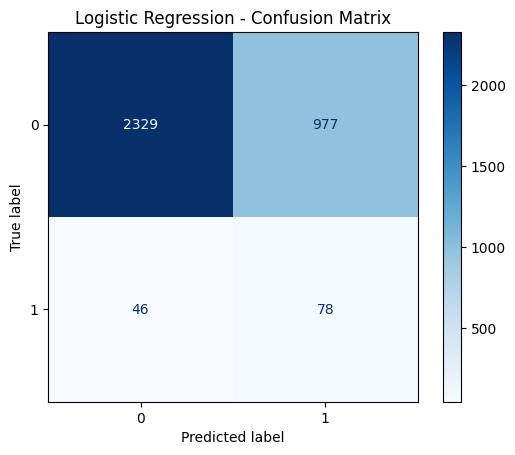

In [ ]:
# ✅ Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek


# 🎯 Target and continuous features
target = '[Stroke)'
continuous_cols = ['Age_at_Exam', 'BMI', 'LDL', 'HDL', 'TG', 'FBS']

# ✅ Train-test split
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# 🧪 MICE imputation
mice_cols = ['LDL', 'HDL', 'TG']
mice = IterativeImputer(random_state=42)
X_train[mice_cols] = mice.fit_transform(X_train[mice_cols])
X_test[mice_cols] = mice.transform(X_test[mice_cols])

# 📏 Scale continuous features
scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

# 🧠 Define pipeline with SMOTETomek and class_weight='balanced'
pipeline = Pipeline([
    ('smoteenn', SMOTEENN(random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced'))
])


# 🔧 Hyperparameter tuning grid
param_grid = {
    'logreg__C': np.logspace(-3, 1, 10),
    'logreg__penalty': ['l1', 'l2']
}

# 🔁 5-Fold Stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train, y_train)

# 📊 Predict & Evaluate
y_pred = grid.predict(X_test)

print("Best Params:", grid.best_params_)
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# 📦 Log to model comparison summary
log_model_results("Logistic Regresion", y_test, y_pred, model=grid.best_estimator_)


In [ ]:
"""
# ✅ Common imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 🎯 Setup target and feature info
target = '[Stroke)'
continuous_cols = ['Age_at_Exam', 'BMI', 'LDL', 'HDL', 'TG', 'FBS']

# ✅ Train-test split
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 🧪 MICE imputation for LDL, HDL, TG
mice_cols = ['LDL', 'HDL', 'TG']
mice = IterativeImputer(random_state=42)
X_train[mice_cols] = mice.fit_transform(X_train[mice_cols])
X_test[mice_cols] = mice.transform(X_test[mice_cols])

# 📏 Scale continuous features
scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])



from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000, solver='liblinear'))
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2'],
    'logreg__class_weight': [None, 'balanced']
}

grid = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Best Params:", grid.best_params_)
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')

log_model_results("Logistic Regression", y_test, y_pred, model=grid.best_estimator_)"""




'\n# ✅ Common imports\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nfrom sklearn.preprocessing import StandardScaler\nfrom imblearn.over_sampling import SMOTE\nfrom sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay\n\n# 🎯 Setup target and feature info\ntarget = \'[Stroke)\'\ncontinuous_cols = [\'Age_at_Exam\', \'BMI\', \'LDL\', \'HDL\', \'TG\', \'FBS\']\n\n# ✅ Train-test split\nX = df.drop(columns=[target])\ny = df[target]\nX_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)\n\n# 🧪 MICE imputation for LDL, HDL, TG\nmice_cols = [\'LDL\', \'HDL\', \'TG\']\nmice = IterativeImputer(random_state=42)\nX_train[mice_cols] = mice.fit_transform(X_train[mice_cols])\nX_test[mice_cols] = mice.transform(X_test[mice_cols])\n\n# 📏 Sca

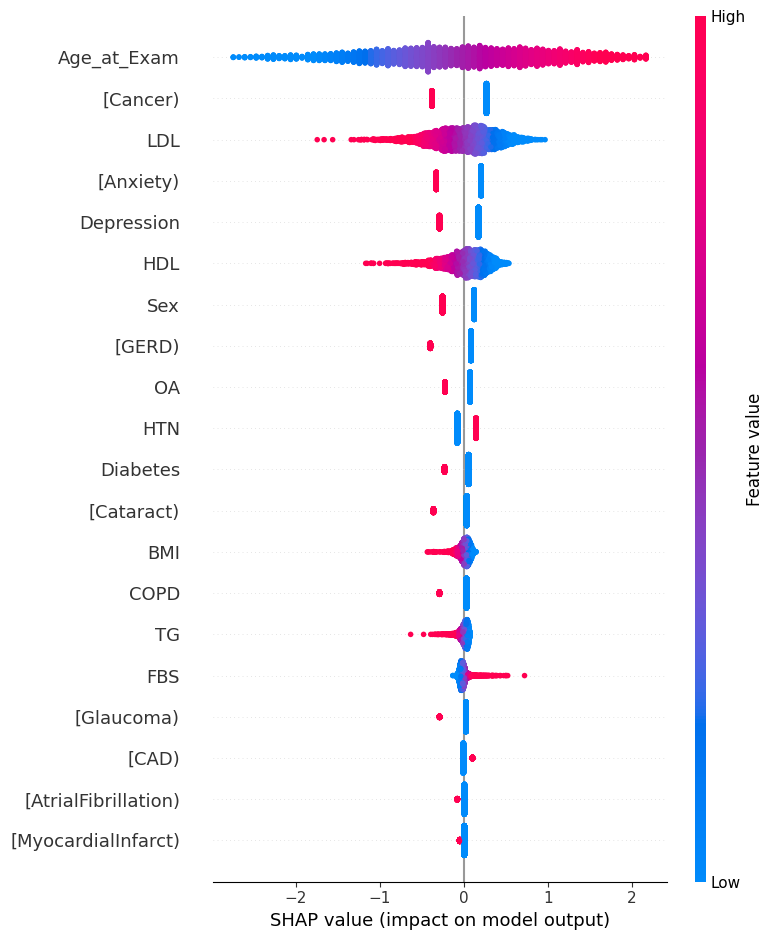

In [ ]:
import shap
shap.initjs()

# Safely extract logistic regression model from pipeline
try:
    best_logreg = grid.best_estimator_.named_steps['logreg']
except:
    best_logreg = grid.best_estimator_

# Create SHAP explainer
explainer = shap.Explainer(best_logreg, X_test)

# Compute SHAP values
shap_values = explainer(X_test)

# Plot global importance
shap.summary_plot(shap_values, X_test)



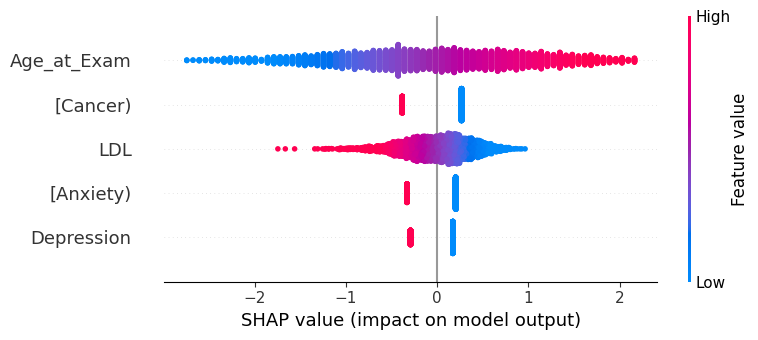

In [ ]:
import shap
shap.initjs()

# Safely extract logistic regression model from pipeline
try:
    best_logreg = grid.best_estimator_.named_steps['logreg']
except:
    best_logreg = grid.best_estimator_

# Create SHAP explainer
explainer = shap.Explainer(best_logreg, X_test)

# Compute SHAP values
shap_values = explainer(X_test)

# Plot global importance — only top 5 features
shap.summary_plot(shap_values, X_test, max_display=5)


## Random Forest

In [ ]:
# 📦 Install required packages (only run once)
!pip install xgboost imbalanced-learn scikit-learn tensorflow

# ✅ Common imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 🎯 Setup target and feature info
target = '[Stroke)'
continuous_cols = ['Age_at_Exam', 'BMI', 'LDL', 'HDL', 'TG', 'FBS']

# ✅ Train-test split
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# 🧪 MICE imputation for LDL, HDL, TG
mice_cols = ['LDL', 'HDL', 'TG']
mice = IterativeImputer(random_state=42)
X_train[mice_cols] = mice.fit_transform(X_train[mice_cols])
X_test[mice_cols] = mice.transform(X_test[mice_cols])

# 📏 Scale continuous features
scaler = StandardScaler()
X_train[continuous_cols] = scaler.fit_transform(X_train[continuous_cols])
X_test[continuous_cols] = scaler.transform(X_test[continuous_cols])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'rf__class_weight': None, 'rf__max_depth': 10, 'rf__n_estimators': 200}
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      3306
         1.0       0.11      0.31      0.16       124

    accuracy                           0.88      3430
   macro avg       0.54      0.61      0.55      3430
weighted avg       0.94      0.88      0.91      3430


Top features:
 Age_at_Exam            0.183098
[Anxiety)              0.179737
[Cancer)               0.125595
[GERD)                 0.097168
LDL                    0.054122
Depression             0.043256
FBS                    0.039746
[Cataract)             0.037451
[MyocardialInfarct)    0.028871
HDL                    0.027473
dtype: float64


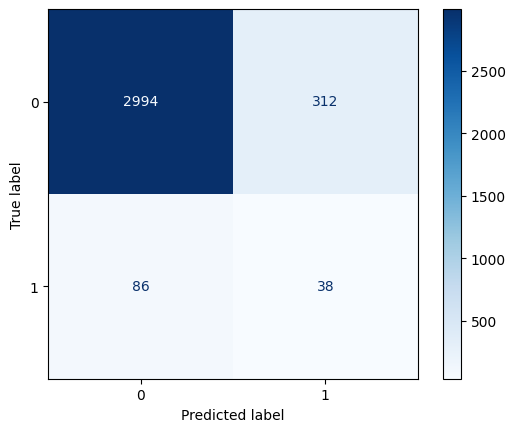

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE  # ✅ only SMOTE now
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__class_weight': [None, 'balanced']
}

grid = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Best Params:", grid.best_params_)
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')

# 🔍 Feature importance
importances = grid.best_estimator_.named_steps['rf'].feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print("\nTop features:\n", feat_imp.head(10))


# 📦 Log results
log_model_results("Random Forest", y_test, y_pred, model=grid.best_estimator_)

## XGBoost

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Params: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__scale_pos_weight': 1}
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      3306
         1.0       0.14      0.23      0.18       124

    accuracy                           0.92      3430
   macro avg       0.56      0.59      0.57      3430
weighted avg       0.94      0.92      0.93      3430


Top features:
 Age_at_Exam             0.103491
_Anxiety_               0.087498
_Cancer_                0.078012
_GERD_                  0.075563
_Cataract_              0.071123
_MyocardialInfarct_     0.062234
_Glaucoma_              0.054386
_AtrialFibrillation_    0.050104
_Neuropathy_            0.046137
Depression              0.040393
dtype: float32


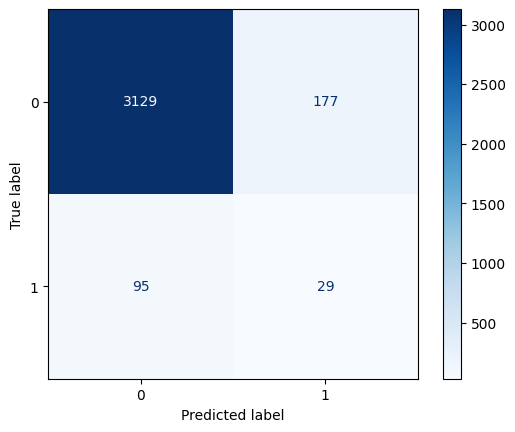

In [ ]:
from xgboost import XGBClassifier

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()]
}

# Sanitize column names for XGBoost
X_train.columns = X_train.columns.str.replace(r"[^\w]", "_", regex=True)
X_test.columns = X_test.columns.str.replace(r"[^\w]", "_", regex=True)


grid = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print("Best Params:", grid.best_params_)
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')

# 🔍 Feature importance
booster = grid.best_estimator_.named_steps['xgb']
feat_imp = pd.Series(booster.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop features:\n", feat_imp.head(10))

log_model_results("XGBoost", y_test, y_pred, model=grid.best_estimator_)



## Neural Network

Epoch 1/25
331/331 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - Recall: 0.4703 - loss: 0.5590 - val_Recall: 0.6736 - val_loss: 0.6588
Epoch 2/25
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.6622 - loss: 0.4748 - val_Recall: 0.7103 - val_loss: 0.6008
Epoch 3/25
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7129 - loss: 0.4229 - val_Recall: 0.7528 - val_loss: 0.5367
Epoch 4/25
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7362 - loss: 0.3910 - val_Recall: 0.7999 - val_loss: 0.4317
Epoch 5/25
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Recall: 0.7630 - loss: 0.3782 - val_Recall: 0.8228 - val_loss: 0.4118
Epoch 6/25
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.7921 - loss: 0.3534 - val_Recall: 0.7770 - val_loss: 0.4879
Epoch 7/25
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8066 - loss: 0.3378 - val_Recall: 0.8183 - val_loss: 0.4251
Epoch 8/25
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8166 - loss: 0.3207 - val_Recall: 0.8672 - val_loss: 0.3398
Epoch 9/

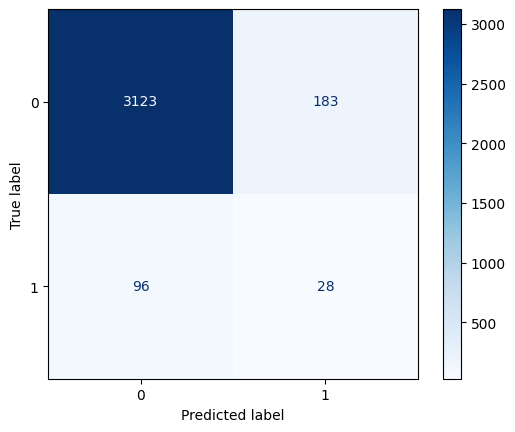

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE

# Apply SMOTE manually
X_train_res, y_train_res = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

history = model.fit(X_train_res, y_train_res, epochs=25, batch_size=64, validation_split=0.2, verbose=1)

# Predict
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')

log_model_results("Neural Network", y_test, y_pred, model=model)




              precision    recall  f1-score   support

         0.0       0.98      0.69      0.81      3306
         1.0       0.07      0.60      0.12       124

    accuracy                           0.68      3430
   macro avg       0.52      0.64      0.46      3430
weighted avg       0.95      0.68      0.78      3430



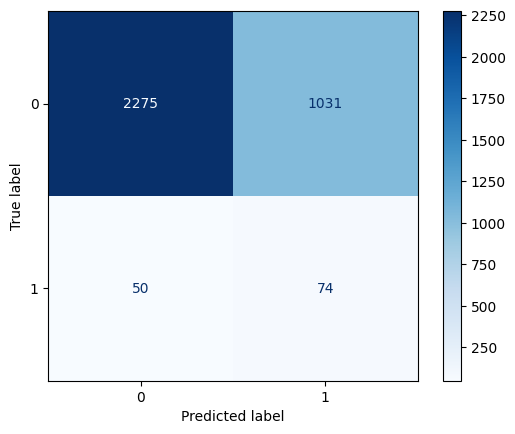

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Separate features
binary_cols = [col for col in X_train.columns if col not in continuous_cols]
X_train_cont = X_train[continuous_cols]
X_test_cont = X_test[continuous_cols]
X_train_bin = X_train[binary_cols]
X_test_bin = X_test[binary_cols]

# Apply SMOTE to combined set first
X_train_combined = pd.concat([X_train_cont, X_train_bin], axis=1)
X_train_smote, y_train_smote = SMOTE(random_state=42).fit_resample(X_train_combined, y_train)

# Split after SMOTE
X_train_cont_sm = X_train_smote[continuous_cols]
X_train_bin_sm = X_train_smote[binary_cols]

# Fit both models
gnb = GaussianNB()
bnb = BernoulliNB()

gnb.fit(X_train_cont_sm, y_train_smote)
bnb.fit(X_train_bin_sm, y_train_smote)

# Combine log-probabilities
log_prob_cont = gnb.predict_log_proba(X_test_cont)
log_prob_bin = bnb.predict_log_proba(X_test_bin)
combined_log_prob = log_prob_cont + log_prob_bin

y_pred = np.argmax(combined_log_prob, axis=1)

# Evaluate
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')

log_model_results("Hybrid Naive Bayes", y_test, y_pred, model=gnb)





In [ ]:
import pandas as pd
from IPython.display import display

results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by='F1 Score', ascending=False)

print("📊 Final Model Comparison Summary:")
display(results_df)


📊 Final Model Comparison Summary:


,Model,Accuracy,Precision,Recall,F1 Score,Explainability,Computation Cost
2,XGBoost,0.920700,0.140777,0.233871,0.175758,Medium,Low
3,Neural Network,0.918659,0.132701,0.225806,0.167164,Low,Low
1,Random Forest,0.883965,0.108571,0.306452,0.160338,Medium,High
0,Logistic Regresion,0.701749,0.073934,0.629032,0.132316,High,High
4,Hybrid Naive Bayes,0.684840,0.066968,0.596774,0.120423,High,Low


In [ ]:
# Convert to DataFrame
results_df = pd.DataFrame(model_results)

# Sort by F1 Score
results_df = results_df.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)

# Set metric columns
score_cols = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Define color styling function with lighter shades
def light_color_scores(val):
    if val < 0.3:
        return 'background-color: #f4cccc'  # light red
    elif val < 0.6:
        return 'background-color: #fce5cd'  # light orange
    else:
        return 'background-color: #d9ead3'  # light green

# Apply styling
styled_table = results_df.style\
    .applymap(light_color_scores, subset=score_cols)\
    .set_caption("Machine Learning Model Comparison")\
    .format({col: "{:.3f}" for col in score_cols})

# Display
display(styled_table)



,Model,Accuracy,Precision,Recall,F1 Score,Explainability,Computation Cost
0,XGBoost,0.921,0.141,0.234,0.176,Medium,Low
1,Neural Network,0.919,0.133,0.226,0.167,Low,Low
2,Random Forest,0.884,0.109,0.306,0.160,Medium,High
3,Logistic Regresion,0.702,0.074,0.629,0.132,High,High
4,Hybrid Naive Bayes,0.685,0.067,0.597,0.120,High,Low
